The purpose of this notebook is to make sure that the JSD between two samples isn't being driven by the difference in detection rate between the two samples. (From Rafa's group meeting)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fjsd = '../../data/analysis/jsd.txt'
fotu = '../../data/clean/rosen.otu_table.rel_abun.clean'

In [3]:
df = pd.read_csv(fjsd, sep='\t')
df.head()

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.400324,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.993353,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-112-7GI,01-164-7GI,0.994055,gastric_fluid,gastric_fluid,gastric_fluid-gastric_fluid,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7RI,0.575080,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7GI,01-164-7TI,0.995439,gastric_fluid,throat_swab,gastric_fluid-throat_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
otu = pd.read_csv(fotu, sep='\t', index_col=0)
print(otu.shape)
otu.head()

(586, 1578)


,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Acidaminococcaceae;g__Phascolarctobacterium;s__;d__denovo58,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XIII;g__Anaerovorax;s__;d__denovo1106,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus2;s__;d__denovo57,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;s__;d__denovo886,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo887,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria;s__;d__denovo884,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillales_Incertae_Sedis_XI;g__Gemella;s__;d__denovo882,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__;d__denovo883,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo880,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo701,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Clostridium_IV;s__;d__denovo954,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo955,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Pseudoflavonifractor;s__;d__denovo950,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Barnesiella;s__;d__denovo951,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo952,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo953,k__Bacteria;p__Firmicutes;c__;o__;f__;g__;s__;d__denovo958,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;d__denovo959,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae;g__Haemophilus;s__;d__denovo2432
01-112-7GI,0.025542,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000070,...,0.000000,0.000033,0.000000,0.000000,0.0,0.000015,0.000000,0.0,0.0,0.0
01-112-7RI,0.013652,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000415,...,0.000000,0.000226,0.000000,0.000000,0.0,0.000004,0.000000,0.0,0.0,0.0
01-112-7TI,0.000000,0.0,0.0,0.000048,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000024,0.0,0.0,0.0
01-164-7GI,0.000011,0.0,0.0,0.000224,0.0,0.0,0.000078,0.0,0.0,0.000000,...,0.000000,0.000000,0.000022,0.000000,0.0,0.000000,0.000034,0.0,0.0,0.0
01-164-7RI,0.010690,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000138,0.000000,0.000000,0.000041,0.0,0.000000,0.000000,0.0,0.0,0.0


In [5]:
# Count how many OTUs are > 0 in each sample
detect = (otu > 0).sum(axis=1).reset_index()
detect.columns = ['sample1', 'detect1']
detect.head()

,sample1,detect1
0,01-112-7GI,472
1,01-112-7RI,472
2,01-112-7TI,326
3,01-164-7GI,398
4,01-164-7RI,292


In [6]:
# Add detection rate in the two samples to my JSD dataframe
print(df.shape)
df = pd.merge(df, detect, left_on='sample1', right_on='sample1', how='left')
detect.columns = ['sample2', 'detect2']
df = pd.merge(df, detect, left_on='sample2', right_on='sample2', how='left')
df.shape

(106030, 39)


(106030, 41)

In [7]:
# Keep only within-batch comparisons
df = df.query('((batch1 == 2016) & (batch2 == 2016)) | ((batch1 == 2014) & (batch2 == 2014))')

# To do maybe, get rid of "bad" samples (second time point, etc)

In [8]:
df['detect1_minus_detect2'] = df['detect1'] - df['detect2']

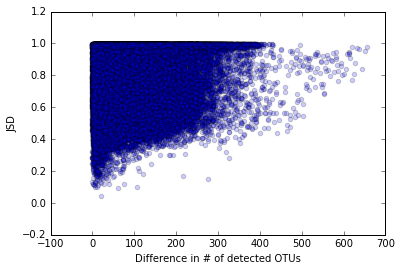

In [9]:
plt.scatter(abs(df['detect1_minus_detect2']), df['beta'], alpha=0.2)
plt.xlabel('Difference in # of detected OTUs')
plt.ylabel('JSD')